# **Text Analytics & Text Mining**
*Text Analytics* merupakan pendekatan dengan metodologi untuk mengekstrak pengetahuan dari data teks. Digunakan untuk kepentingan bisnis dan pengambilan keputusan lainnya.
> 
Sedangkan *Text Mining* merupakan alat yang digunakan pada *Text Analytics*.


## **Text Mining**
*Text Mining* merupakan proses melihat pola dan insight baru yang berasal dari banyaknya data yang pada awalnya tidak terstruktur (*unstructured data*). Pengolahan *Text Mining* membutuhkan proses yang dinamakan *Pre-Processing Data*.

## **Pre-Processing Data**
*Pre-Processing Data* merupakan proses untuk mempersiapkan data mentah (*raw data*) sebelum dilakukannya proses lain. Pada umunya, *pre-processing data* dilakukan dengan cara mengeliminasi data yang tidak sesuai atau mengubah data menjadi bentuk yang lebih mudah diproses oleh sistem.

Selain itu, praktikum kali ini akan membahas metode dalam *text mining* yaitu **Sentiment Analysis** dan **Topic Modelling**


1.   **Sentiment Analysis**

> Sentiment Analysis merupakan proses memahami dan mengelompokkan emosi (positif, negatif, dan netral) yang terdapat dalam tulisan menggunakan teknik Text Analytics. Data emosi tersebut dapat menjelaskan opini masyarakat mengenai produk, merek, layanan, politik, atau topik lainnya. Perusahaan, pemerintah, maupun bidang lainnya kemudian memanfaatkan data-data tersebut untuk membuat analisis pemasaran, review produk, umpan-balik produk, dan layanan masyarakat.

2.   **Topic Modelling**

> Topic Modelling merupakan pengelompokkan data teks berdasarkan suatu topik tertentu. Topic Modelling memiliki tujuan yang sama dengan classification tetapi menggunakan pendekatan berbeda. Topic Modelling tidak membutuhkan data berlabel (unsupervised learning) dan bekerja seperti clustering karena mengelompokkan data teks berdasarkan kemiripannya.








Praktikum kali ini menggunakan data tweet terkait Digital Currency sepanjang tahun 2020.

###**1. Install and Load Packages**

- packages tweet-preprocessor: memudahkan untuk membersihkan, mengurai, atau memberi token pada tweet.
- packages pyLDAvis: LDA (Latent Dirichlet Allocation) membantu dalam metode *Topic Modelling*

In [ ]:
# Install packages
! pip install tweet-preprocessor
! pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 29.8 MB/s 
     |████████████████████████████████| 11.3 MB 36.7 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=d16c498e40ffd3f31b72710a82b1e6e0bd1fcab85502dbb7203da5a041e932be
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
# Install pandas versi 1.3.0
  # (untuk mempermudah proses transformasi data)
! pip install pandas==1.3.0

     |████████████████████████████████| 10.8 MB 11.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 which is incompatible.


In [ ]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import numpy as np
import networkx as nx
import wordcloud
import nltk
import warnings
import itertools
import re
import os
import random
import pyLDAvis
import pyLDAvis.sklearn 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# Import module
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from tqdm import tqdm
from nltk import bigrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Set parameter
 # (untuk mengabaikan 'filter warnings')
warnings.filterwarnings('ignore')
pyLDAvis.enable_notebook()

### **2. Import Data**
Dataset Digital Currency yang digunakan berasal dari github, sehingga import data langsung menggunakan link dataset

In [ ]:
# Import data
from google.colab import files
uploaded = files.upload()

Saving Ole.csv to Ole.csv


In [ ]:
# Lihat 5 baris pertama data
df = pd.read_csv('Ole.csv', sep =",")
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Everyone is romanticising Ole even more now th...,False,0,NaN,2021-12-01 11:33:13,False,NaN,1466007472892792843,NaN,"<a href=""http://twitter.com/download/android"" ...",FireLordOzai8,0,False,False,NaN,NaN
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,False,0,ManUtd,2021-12-01 11:10:37,False,1.466001e+18,1466001786137759747,558797310.0,"<a href=""http://twitter.com/download/android"" ...",MalcolmBoxLUHG,0,False,False,NaN,NaN
2,"@ManUtd Announced #oleout , announced #RRin, n...",False,0,ManUtd,2021-12-01 10:04:54,False,1.465985e+18,1465985246831198210,558797310.0,"<a href=""http://twitter.com/download/android"" ...",ogchris_oficial,0,False,False,NaN,NaN
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,False,0,NaN,2021-12-01 09:41:23,False,NaN,1465979330127806468,NaN,"<a href=""http://twitter.com/download/android"" ...",SunitaS25480206,7,True,False,NaN,NaN
4,RT @honsilasnjura: Manchester United fans are ...,False,0,NaN,2021-12-01 09:39:23,False,NaN,1465978827981705218,NaN,"<a href=""http://twitter.com/download/android"" ...",honsilasnjura,314,True,False,NaN,NaN


In [ ]:
df1 = df.drop(['id','replyToSN','screenName','favorited','favoriteCount','truncated','replyToSID','replyToUID','statusSource','retweetCount','isRetweet','retweeted','longitude','latitude'], axis=1)
df1

,text,created
0,Everyone is romanticising Ole even more now th...,2021-12-01 11:33:13
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,2021-12-01 11:10:37
2,"@ManUtd Announced #oleout , announced #RRin, n...",2021-12-01 10:04:54
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,2021-12-01 09:41:23
4,RT @honsilasnjura: Manchester United fans are ...,2021-12-01 09:39:23
...,...,...
995,"Ole, wherever you are, sth punish your left ny...",2021-11-23 19:44:28
996,@sanjeevjasani He was #OleOut 🤣,2021-11-23 19:44:16
997,Looks like Sancho was #OleOut all along @utdmwb,2021-11-23 19:44:13
998,It’s almost as if Jadon Sancho is a right wing...,2021-11-23 19:43:15


In [ ]:
# Melihat ringkasan singkat dari dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     1000 non-null   object
 1   created  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### **3. Text Preprocessing**
Proses pengolahan data

In [ ]:
# Pilih kolom 'TEXT' saja
tweet = df[['text']]

# Lihat 5 baris pertama data
tweet.head()

,text
0,Everyone is romanticising Ole even more now th...
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...
2,"@ManUtd Announced #oleout , announced #RRin, n..."
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...
4,RT @honsilasnjura: Manchester United fans are ...


#### **a. Transformation**
Membersihkan dataset dari URLs, hashtags, mentions, RT & Fav, emoji, smileys, & number menggunakan packages tweet-preprocessor. Dilanjutkan dengan mengubah huruf pada dataset menjadi huruf kecil (lowercase)

In [ ]:
# Membuat fungsi transformasi tweet
 # dilanjutkan dengan mengubah huruf pada dataset menjadi lowercase

def transform_tweet(row):
  tweet = row['text']
  tweet = p.clean(tweet)
  tweet = str.lower(tweet)
  return tweet

In [ ]:
# Mengaplikasikan fungsi transformasi dengan membuat kolom baru di dataset
tweet['transformed'] = tweet.apply(transform_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning) 

,text,transformed
0,Everyone is romanticising Ole even more now th...,everyone is romanticising ole even more now th...
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,sack the norwegian goblin ffs
2,"@ManUtd Announced #oleout , announced #RRin, n...","announced , announced , now announce"
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,: the reality of pitra puja is that it is proh...
4,RT @honsilasnjura: Manchester United fans are ...,: manchester united fans are leaving the stadi...


#### **b. Tokenization**
Memotong teks menjadi unit yang lebih kecil yang disebut 'token'

In [ ]:
# Download Punkt
# Punkt merupakan alat 'Tokenizer' yang membagi teks menjadi unit-unit yang lebih kecil
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Membuat fungsi tokenization

def tokenize_tweet(row):
    tweet = row['transformed']
    tokens = nltk.word_tokenize(tweet)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [ ]:
# Mengaplikasikan fungsi tokenization dengan membuat kolom baru di dataset
tweet['tokenized'] = tweet.apply(tokenize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization

,text,transformed,tokenized
0,Everyone is romanticising Ole even more now th...,everyone is romanticising ole even more now th...,"[everyone, is, romanticising, ole, even, more,..."
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,sack the norwegian goblin ffs,"[sack, the, norwegian, goblin, ffs]"
2,"@ManUtd Announced #oleout , announced #RRin, n...","announced , announced , now announce","[announced, announced, now, announce]"
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,: the reality of pitra puja is that it is proh...,"[the, reality, of, pitra, puja, is, that, it, ..."
4,RT @honsilasnjura: Manchester United fans are ...,: manchester united fans are leaving the stadi...,"[manchester, united, fans, are, leaving, the, ..."


#### **c. Stemming**
Mengubah kata menjadi bentuk dasar umum (memotong/stem)

In [ ]:
# Membuat fungsi stemming
def stemming_tweet(row):
    list = row['tokenized']
    stemming_list = [PorterStemmer().stem(w) for w in list]
    return(stemming_list)

In [ ]:
# Mengaplikasikan fungsi stemming dengan membuat kolom baru di dataset
tweet['stemmed'] = tweet.apply(stemming_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming

,text,transformed,tokenized,stemmed
0,Everyone is romanticising Ole even more now th...,everyone is romanticising ole even more now th...,"[everyone, is, romanticising, ole, even, more,...","[everyon, is, romanticis, ole, even, more, now..."
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,sack the norwegian goblin ffs,"[sack, the, norwegian, goblin, ffs]","[sack, the, norwegian, goblin, ff]"
2,"@ManUtd Announced #oleout , announced #RRin, n...","announced , announced , now announce","[announced, announced, now, announce]","[announc, announc, now, announc]"
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,: the reality of pitra puja is that it is proh...,"[the, reality, of, pitra, puja, is, that, it, ...","[the, realiti, of, pitra, puja, is, that, it, ..."
4,RT @honsilasnjura: Manchester United fans are ...,: manchester united fans are leaving the stadi...,"[manchester, united, fans, are, leaving, the, ...","[manchest, unit, fan, are, leav, the, stadium,..."


#### **d. Lemmatization**
Mengubah kata menjadi bentuk dasar umum menggunakan analisis morfologi. Lemmatization biasanya lebih baik hasilnya dari Stemming. Stemming hanya memotong kata, sedangkan Lemmatization memotong kata dan menggunakan dictionary yang lebih lengkap.

In [ ]:
# Download Wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Membuat fungsi lemmatization
def lemmatize_tweet(row):
    list = row['tokenized']
    lemmatize_list = [WordNetLemmatizer().lemmatize(w, pos= 'v') for w in list]
    return(lemmatize_list)

In [ ]:
# Mengaplikasikan fungsi lemmatization dengan membuat kolom baru di dataset
tweet['lemmatized'] = tweet.apply(lemmatize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization

,text,transformed,tokenized,stemmed,lemmatized
0,Everyone is romanticising Ole even more now th...,everyone is romanticising ole even more now th...,"[everyone, is, romanticising, ole, even, more,...","[everyon, is, romanticis, ole, even, more, now...","[everyone, be, romanticise, ole, even, more, n..."
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,sack the norwegian goblin ffs,"[sack, the, norwegian, goblin, ffs]","[sack, the, norwegian, goblin, ff]","[sack, the, norwegian, goblin, ffs]"
2,"@ManUtd Announced #oleout , announced #RRin, n...","announced , announced , now announce","[announced, announced, now, announce]","[announc, announc, now, announc]","[announce, announce, now, announce]"
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,: the reality of pitra puja is that it is proh...,"[the, reality, of, pitra, puja, is, that, it, ...","[the, realiti, of, pitra, puja, is, that, it, ...","[the, reality, of, pitra, puja, be, that, it, ..."
4,RT @honsilasnjura: Manchester United fans are ...,: manchester united fans are leaving the stadi...,"[manchester, united, fans, are, leaving, the, ...","[manchest, unit, fan, are, leav, the, stadium,...","[manchester, unite, fan, be, leave, the, stadi..."


#### **e. Stopword Removal**
Menghapus kata yang tidak menambahkan arti pada kalimat.
Contoh:
> 
English: a, about, be, because, being, between, by, can't, do, during, from, have, he, she, him, her, it, is, i'm, you, too, they, this, etc.
> 
Indonesian: ada, agar, apa, nah, pula, pun, itu, dan, wah, yang, atau, dll.




In [ ]:
# Download stopword bahasa inggris
nltk.download('stopwords')
stops = set(stopwords.words("english"))     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Membuat fungsi stopword
def stopword_tweet(row):
    list = row['lemmatized']
    stopword_list = [w for w in list if not w in stops]
    return(stopword_list)

In [ ]:
# Mengaplikasikan fungsi Stopword dengan membuat kolom baru di dataset
tweet['stopword'] = tweet.apply(stopword_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization
# kolom 'stopword' merupakan teks setelah melalui proses stopword removal

,text,transformed,tokenized,stemmed,lemmatized,stopword
0,Everyone is romanticising Ole even more now th...,everyone is romanticising ole even more now th...,"[everyone, is, romanticising, ole, even, more,...","[everyon, is, romanticis, ole, even, more, now...","[everyone, be, romanticise, ole, even, more, n...","[everyone, romanticise, ole, even, sack, man, ..."
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,sack the norwegian goblin ffs,"[sack, the, norwegian, goblin, ffs]","[sack, the, norwegian, goblin, ff]","[sack, the, norwegian, goblin, ffs]","[sack, norwegian, goblin, ffs]"
2,"@ManUtd Announced #oleout , announced #RRin, n...","announced , announced , now announce","[announced, announced, now, announce]","[announc, announc, now, announc]","[announce, announce, now, announce]","[announce, announce, announce]"
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,: the reality of pitra puja is that it is proh...,"[the, reality, of, pitra, puja, is, that, it, ...","[the, realiti, of, pitra, puja, is, that, it, ...","[the, reality, of, pitra, puja, be, that, it, ...","[reality, pitra, puja, prohibit, holy, scriptu..."
4,RT @honsilasnjura: Manchester United fans are ...,: manchester united fans are leaving the stadi...,"[manchester, united, fans, are, leaving, the, ...","[manchest, unit, fan, are, leav, the, stadium,...","[manchester, unite, fan, be, leave, the, stadi...","[manchester, unite, fan, leave, stadium, pogba..."


#### **f. Rejoin Token**
Menggabungkan token / kata-kata yang telah sampai proses stopword menjadi kalimat utuh.

In [ ]:
# Membuat fungsi rejoin untuk mengembalikan sebagai kalimat utuh
def rejoin_tweet(row):
    list = row['stopword']
    joined_words = ( " ".join(list))
    return joined_words

In [ ]:
# Mengaplikasikan fungsi rejoin dengan membuat kolom baru di dataset
tweet['final'] = tweet.apply(rejoin_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head()

# kolom 'text' merupakan teks sebelum diubah
# kolom 'transformed' merupakan teks setelah melalui proses transformasi (cleaning)
# kolom 'tokenized' merupakan teks setelah melalui proses tokenization
# kolom 'stemmed' merupakan teks setelah melalui proses stemming
# kolom 'lemmatized' merupakan teks setelah melalui proses lemmatization
# kolom 'stopword' merupakan teks setelah melalui proses stopword removal
# kolom 'final' merupakan teks setelah melalui proses rejoin token

,text,transformed,tokenized,stemmed,lemmatized,stopword,final
0,Everyone is romanticising Ole even more now th...,everyone is romanticising ole even more now th...,"[everyone, is, romanticising, ole, even, more,...","[everyon, is, romanticis, ole, even, more, now...","[everyone, be, romanticise, ole, even, more, n...","[everyone, romanticise, ole, even, sack, man, ...",everyone romanticise ole even sack man disgrace
1,@ManUtd SACK THE NORWEGIAN GOBLIN FFS\n\n#OleO...,sack the norwegian goblin ffs,"[sack, the, norwegian, goblin, ffs]","[sack, the, norwegian, goblin, ff]","[sack, the, norwegian, goblin, ffs]","[sack, norwegian, goblin, ffs]",sack norwegian goblin ffs
2,"@ManUtd Announced #oleout , announced #RRin, n...","announced , announced , now announce","[announced, announced, now, announce]","[announc, announc, now, announc]","[announce, announce, now, announce]","[announce, announce, announce]",announce announce announce
3,RT @AbGhanshyam: @kanchanad123 \n#TruthOfShraa...,: the reality of pitra puja is that it is proh...,"[the, reality, of, pitra, puja, is, that, it, ...","[the, realiti, of, pitra, puja, is, that, it, ...","[the, reality, of, pitra, puja, be, that, it, ...","[reality, pitra, puja, prohibit, holy, scriptu...",reality pitra puja prohibit holy scriptures vi...
4,RT @honsilasnjura: Manchester United fans are ...,: manchester united fans are leaving the stadi...,"[manchester, united, fans, are, leaving, the, ...","[manchest, unit, fan, are, leav, the, stadium,...","[manchester, unite, fan, be, leave, the, stadi...","[manchester, unite, fan, leave, stadium, pogba...",manchester unite fan leave stadium pogba red c...


In [ ]:
# Final tweet yang sudah di proses
 # mengubah nama kolom "final" menjadi "text" untuk ditampilkan dengan variabel tweet_clean

tweet_clean = tweet[['final']]
tweet_clean = tweet_clean.rename(columns={'final': 'text'})

# Lihat 5 baris pertama data
tweet_clean.head()

,text
0,everyone romanticise ole even sack man disgrace
1,sack norwegian goblin ffs
2,announce announce announce
3,reality pitra puja prohibit holy scriptures vi...
4,manchester unite fan leave stadium pogba red c...


### **4. WordCloud**
WordCloud merupakan bagian dari Content Description untuk melihat kemunculan dari kata-kata. Kata yang ukurannya paling besar yang muncul merupakan kata yang paling banyak kuantitasnya dalam dataset.

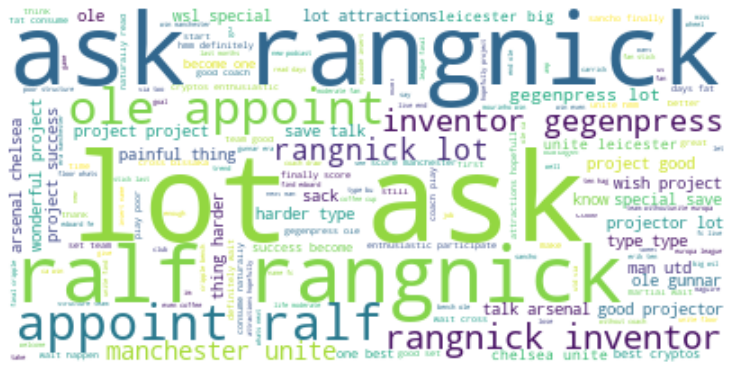

In [ ]:
# Visualisasi Word Cloud
text_wordcloud = " ".join(tweet for tweet in tweet_clean.text)

cloud = WordCloud(background_color='white').generate(text_wordcloud)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **5. Sentiment Analysis**

Sentiment analysis proses memahami negatif, positif, central dalam penulisan
polaritas adalah pengukuran untuk melihat seberapa positif/negatif si opini text dalam data

In [ ]:
# Download corpus untuk sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in tweet_clean.iterrows():
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
tweet_clean['polarity'] = se.values
display(tweet_clean.head(5))

,text,polarity
0,everyone romanticise ole even sack man disgrace,"{'neg': 0.294, 'neu': 0.459, 'pos': 0.248, 'co..."
1,sack norwegian goblin ffs,"{'neg': 0.559, 'neu': 0.441, 'pos': 0.0, 'comp..."
2,announce announce announce,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,reality pitra puja prohibit holy scriptures vi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,manchester unite fan leave stadium pogba red c...,"{'neg': 0.077, 'neu': 0.774, 'pos': 0.148, 'co..."


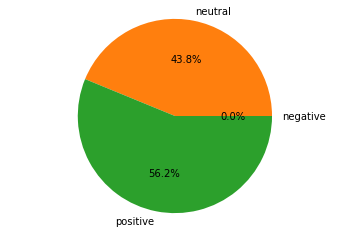

In [ ]:
# Visualisasi Pie Chart
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

### **6. Topic Modelling**

pengelompokan data text pada data tertentu sama seperti klasifikasi
jadi mengklasifikasi topik dalam suatu dataset, jadi clustering orang2 dengan mengklasifikasi

In [ ]:
# clone tambahan library dari github
! git clone https://github.com/machine-learning-ss/tm

# Set Data Directory
os.chdir('tm')

Cloning into 'tm'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
# Melihat total loaded tweets

import MyLib as TS

Tweets = tweet_clean['text']
print('Total loaded tweets = {0}'.format(len(Tweets)))

Total loaded tweets = 1000


In [ ]:
# Menentukan banyaknya jumlah topik dan kata-kata yang akan diambil
n_topics = 4
top_topics = 4
top_words = 10

In [ ]:
# Feature Extraction
count_vector = CountVectorizer(token_pattern = r'\b[a-zA-Z]{3,}\b') 
dtm_tf = count_vector.fit_transform(Tweets)
tf_terms = count_vector.get_feature_names()

100%|██████████| 1000/1000 [00:00<00:00, 333172.13it/s]

In total there are 4 major topics, distributed as follows


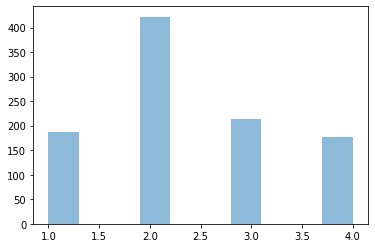

Printing top 4 Topics, with top 10 Words:
Topic #0:
project good lot wonderful attractions projector podcast fan guy new
Topic #1:
rangnick ole lot ask ralf get appoint gegenpress inventor unite
Topic #2:
type sancho get one best thing harder make painful success
Topic #3:
unite wait manchester chelsea finally definitely score hmm special happen


In [ ]:
# Fungsi untuk mencari topic
lda_tf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)

# Menampilkan Topik
vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
print('Printing top {0} Topics, with top {1} Words:'.format(top_topics, top_words))
TS.print_Topics(lda_tf, tf_terms, top_topics, top_words)

In [ ]:
# Visualisasi Topic Secara Interaktif
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vector) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.281398 -0.062075       1        1  38.606545
2      0.134387 -0.169759       2        1  21.885949
3      0.134829  0.020556       3        1  20.046378
0      0.012182  0.211278       4        1  19.461128, topic_info=            Term        Freq       Total Category  logprob  loglift
841     rangnick  252.000000  252.000000  Default  30.0000  30.0000
816      project   88.000000   88.000000  Default  29.0000  29.0000
730          ole  155.000000  155.000000  Default  28.0000  28.0000
62           ask  153.000000  153.000000  Default  27.0000  27.0000
604          lot  176.000000  176.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
604          lot   23.024865  176.546034   Topic4  -3.9439  -0.4003
1152        want    6.535532   10.653182   Topic4  -5.2032   1.1481
1122       unite   11.752039   99.499244   Topic4  -4.6164  -0.4994
626   manchester    9.835556   69.476355   Topic4  -4.7944  -0.3182
1055        team    6.009435   40.212165   Topic4  -5.2871  -0.2641

[204 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
9         4  0.951207        action
48        2  0.798184       anymore
54        1  0.989983       appoint
55        2  0.951190  appreciation
60        3  0.975252       arsenal
...     ...       ...           ...
1191      3  0.062108       without
1191      4  0.124216       without
1195      4  0.978135     wonderful
1207      3  0.957554           wsl
1210      4  0.909334          year

[228 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])